## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

### We start by importing the py file ExchangeEconomy

In [52]:
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

### Solving the question

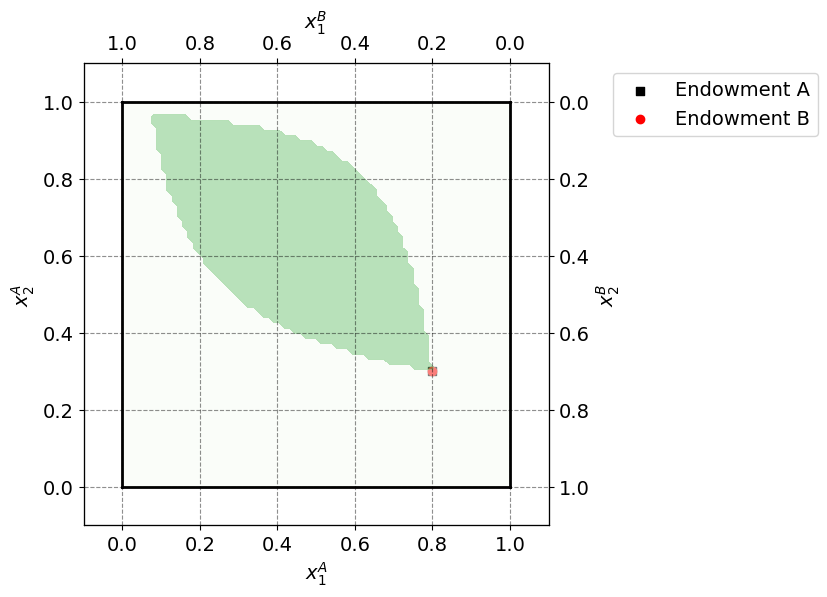

In [55]:

# Defining utility functions
def utility_A(x1A, x2A, alpha=1/3):
    """Calculate utility for consumer A."""
    return (x1A ** alpha) * (x2A ** (1 - alpha))

def utility_B(x1B, x2B, beta=2/3):
    """Calculate utility for consumer B."""
    return (x1B ** beta) * (x2B ** (1 - beta))

# Given initial endowments and parameters
w1A_initial = 0.8
w2A_initial = 0.3

# Calculating B's initial endowments based on total endowments minus A's
W1B_initial = 1 - w1A_initial
W2B_initial = 1 - w2A_initial

alpha = 1/3
beta = 2/3

# Initial utility for both consumers
utility_A_initial = utility_A(w1A_initial, w2A_initial, alpha)
utility_B_initial = utility_B(W1B_initial, W2B_initial, beta)

# Generate a grid of x1A and x2A values
x1A_vals = np.linspace(0, 1, 75)
x2A_vals = np.linspace(0, 1, 75)
x1A_grid, x2A_grid = np.meshgrid(x1A_vals, x2A_vals)

# Calculate utilities for all combinations for A and the corresponding for B
utility_A_grid = utility_A(x1A_grid, x2A_grid, alpha)
utility_B_grid = utility_B(1 - x1A_grid, 1 - x2A_grid, beta)

# Identify combinations that are Pareto improvements
pareto_improvements_mask = (utility_A_grid >= utility_A_initial) & (utility_B_grid >= utility_B_initial)

# Setting up the figure for the Edgeworth Box with four axes
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the initial endowments
ax_A.scatter(w1A_initial, w2A_initial, marker='s', color='black', label='Endowment A')
# Adjusted plotting for B's endowment
ax_A.scatter(1 - W1B_initial, 1 - W2B_initial, marker='o', color='red', label='Endowment B')

# Plotting the bounds of the box
ax_A.plot([0, 1], [0, 0], lw=2, color='black')
ax_A.plot([0, 1], [1, 1], lw=2, color='black')
ax_A.plot([0, 0], [0, 1], lw=2, color='black')
ax_A.plot([1, 1], [0, 1], lw=2, color='black')

ax_A.set_xlim([-0.1, 1.1])
ax_A.set_ylim([-0.1, 1.1])
ax_B.set_xlim([1.1, -0.1])
ax_B.set_ylim([1.1, -0.1])

# Contour plot for Pareto improvements
ax_A.contourf(x1A_grid, x2A_grid, pareto_improvements_mask, cmap="Greens", alpha=0.5, levels=[0.5, 1], extend='both')

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()


It is worth noting that the endowments for A and B is at the some point. It can also be seen that any other allocations would be an pareto improvement, since both consumers would get atleats as much utility

# Question 2

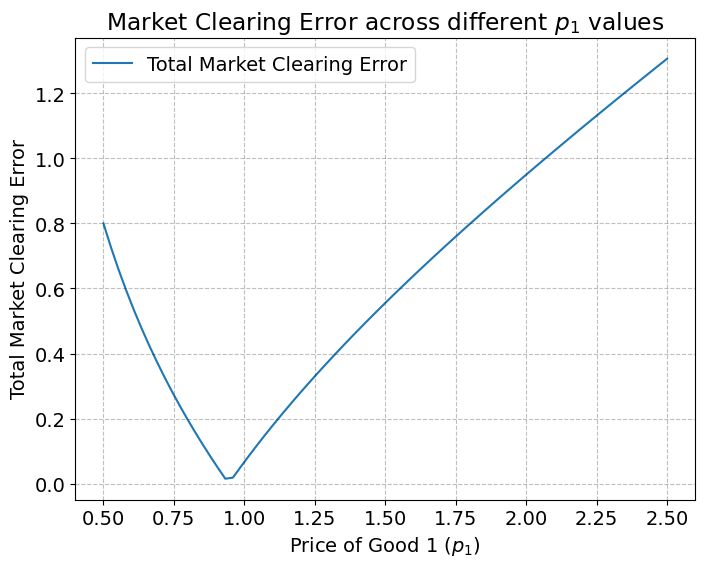

In [57]:

# Define a range of p1 values to explore
p_values = np.linspace(0.5, 2.5, 75)
ErrorList = []

# Calculate the market clearing errors for each p1 value
for p1 in p_values:
    total_error = model.market_clearing_error(p1)
    ErrorList.append(total_error)

# Plotting the total market clearing error against p1 values
plt.figure(figsize=(8, 6))
plt.plot(p_values, ErrorList, label='Total Market Clearing Error', zorder=1)
plt.xlabel('Price of Good 1 ($p_1$)')
plt.ylabel('Total Market Clearing Error')
plt.title('Market Clearing Error across different $p_1$ values')
plt.legend()
plt.grid(True)
plt.show()


# Question 3

In [58]:
# Find the market-clearing price using the method from the class
market_clearing_price = model.find_market_clearing_price()
print(f"Market-Clearing Price for Good 1: {market_clearing_price:.4f}")

Market-Clearing Price for Good 1: 0.9444


# Question 4A

In [59]:
P1 = np.linspace(0.5, 2.5, 75)  # Define your set of discrete prices

optimal_price, optimal_allocation_A, max_utility = model.maximize_consumer_A_utility_discrete(P1)
print(f"Optimal price for Consumer A (discrete): {optimal_price:.4f}")
print(f"Optimal allocation for Consumer A: x1A={optimal_allocation_A[0]:.4f}, x2A={optimal_allocation_A[1]:.4f}")
print(f"Maximum utility for Consumer A: {max_utility:.4f}")


Optimal price for Consumer A (discrete): 1.9054
Optimal allocation for Consumer A: x1A=0.6217, x2A=0.6396
Maximum utility for Consumer A: 0.6336


c:\Users\rasmu\OneDrive\UNI\introproc\IntroProg-lectures-main\Rjb144\IntroProg-lectures-main\projects-2024-rasmus\inauguralproject\ExchangeEconomy.py:11: RuntimeWarning: invalid value encountered in scalar power
  return (x1A ** self.par.alpha) * (x2A ** (1 - self.par.alpha))


# Question 4B

In [60]:
# Assuming 'model' is an instance of your ExchangeEconomyClass
optimal_price_continuous, optimal_allocation_A_continuous, max_utility_continuous = model.maximize_consumer_A_utility_continuous()

# Displaying the results
print(f"Optimal price for Consumer A (continuous): {optimal_price_continuous:.4f}")
print(f"Optimal allocation for Consumer A: x1A={optimal_allocation_A_continuous[0]:.4f}, x2A={optimal_allocation_A_continuous[1]:.4f}")
print(f"Maximum utility for Consumer A: {max_utility_continuous:.4f}")


Optimal price for Consumer A (continuous): 1.8993
Optimal allocation for Consumer A: x1A=0.6210, x2A=0.6400
Maximum utility for Consumer A: 0.6336


# Question 5A

In [61]:
# Optimize the allocation for Pareto improvements
optimal_allocation, max_utility = model.optimize_allocation_pareto_improvement()

# Display the results
print(f"Optimal allocation for Consumer A: x1A = {optimal_allocation[0]:.4f}, x2A = {optimal_allocation[1]:.4f}")
print(f"Maximum utility for Consumer A under Pareto improvement: {max_utility:.4f}")

Optimal allocation for Consumer A: x1A = 0.5757, x2A = 0.8444
Maximum utility for Consumer A under Pareto improvement: 0.7432


# Question 5B

In [62]:
# Run the optimization
model.maximize_utility_unrestricted()

The optimal allocation for A is: (0.5757, 0.8444)
The optimal allocation for B is: (0.4243, 0.1556)
A's utility: 0.7432
B's utility: 0.3037
Total utility: 1.0469


# Question 6A

In [63]:
# Assuming you have already imported ExchangeEconomyClass and initialized an instance named model

# Maximize the aggregate utility
optimal_allocation_A, optimal_allocation_B, total_utility = model.maximize_aggregate_utility()

# Display the results
print(f"Optimal allocation for Consumer A: x1A={optimal_allocation_A[0]:.4f}, x2A={optimal_allocation_A[1]:.4f}")
print(f"Optimal allocation for Consumer B: x1B={optimal_allocation_B[0]:.4f}, x2B={optimal_allocation_B[1]:.4f}")
print(f"Total aggregate utility: {total_utility:.4f}")


Optimal allocation for Consumer A: x1A=0.3334, x2A=0.6668
Optimal allocation for Consumer B: x1B=0.6666, x2B=0.3332
Total aggregate utility: 1.0583


# Question 6B

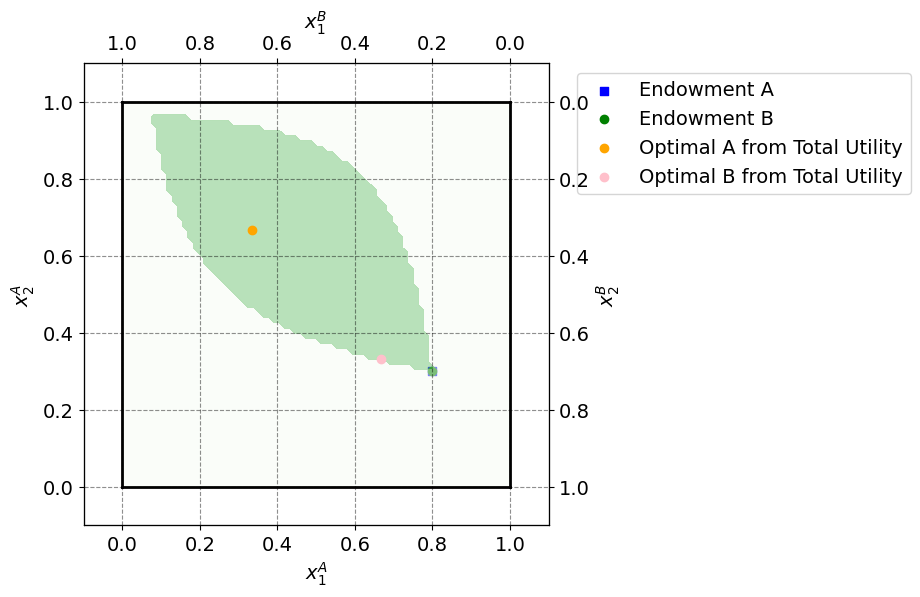

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Defining utility functions
def utility_A(x1A, x2A, alpha=1/3):
    """Calculate utility for consumer A."""
    return (x1A ** alpha) * (x2A ** (1 - alpha))

def utility_B(x1B, x2B, beta=2/3):
    """Calculate utility for consumer B."""
    return (x1B ** beta) * (x2B ** (1 - beta))

# Given initial endowments and parameters
w1A_initial = 0.8
w2A_initial = 0.3

# Calculating B's initial endowments based on total endowments minus A's
W1B_initial = 1 - w1A_initial
W2B_initial = 1 - w2A_initial

alpha = 1/3
beta = 2/3

# Initial utility for both consumers
utility_A_initial = utility_A(w1A_initial, w2A_initial, alpha)
utility_B_initial = utility_B(W1B_initial, W2B_initial, beta)

# Generate a grid of x1A and x2A values
x1A_vals = np.linspace(0, 1, 75)
x2A_vals = np.linspace(0, 1, 75)
x1A_grid, x2A_grid = np.meshgrid(x1A_vals, x2A_vals)

# Calculate utilities for all combinations for A and the corresponding for B
utility_A_grid = utility_A(x1A_grid, x2A_grid, alpha)
utility_B_grid = utility_B(1 - x1A_grid, 1 - x2A_grid, beta)

# Identify combinations that are Pareto improvements
pareto_improvements_mask = (utility_A_grid >= utility_A_initial) & (utility_B_grid >= utility_B_initial)

# Setting up the figure for the Edgeworth Box with four axes
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the initial endowments with new colors
ax_A.scatter(w1A_initial, w2A_initial, marker='s', color='blue', label='Endowment A')
ax_A.scatter(1 - W1B_initial, 1 - W2B_initial, marker='o', color='green', label='Endowment B')

# Plotting the bounds of the box
ax_A.plot([0, 1], [0, 0], lw=2, color='black')
ax_A.plot([0, 1], [1, 1], lw=2, color='black')
ax_A.plot([0, 0], [0, 1], lw=2, color='black')
ax_A.plot([1, 1], [0, 1], lw=2, color='black')

ax_A.set_xlim([-0.1, 1.1])
ax_A.set_ylim([-0.1, 1.1])
ax_B.set_xlim([1.1, -0.1])
ax_B.set_ylim([1.1, -0.1])

# Contour plot for Pareto improvements
ax_A.contourf(x1A_grid, x2A_grid, pareto_improvements_mask, cmap="Greens", alpha=0.5, levels=[0.5, 1], extend='both')

# Calculate the optimal allocation that maximizes total utility
optimal_allocation_A_total, optimal_allocation_B_total, _ = model.maximize_total_utility()

# Add the optimal allocation from maximize_total_utility to the plot with new colors
ax_A.scatter(optimal_allocation_A_total[0], optimal_allocation_A_total[1], color='orange', label='Optimal A from Total Utility', zorder=5)
ax_A.scatter(1 - optimal_allocation_A_total[0], 1 - optimal_allocation_A_total[1], color='pink', label='Optimal B from Total Utility', zorder=5)

# Move the legend to the right
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.8, 1.0))

plt.show()